In [1]:
from src.hello_world import print_hello_world

In [2]:
print_hello_world()

Hello World!


In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from PIL import Image

# Try YOLOv5

In [3]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\lxyma/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-4 Python-3.10.10 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12287MiB)



requirements: C:\Users\lxyma\.cache\torch\hub\requirements.txt not found, check failed.


100%|██████████| 14.1M/14.1M [00:04<00:00, 3.70MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 720x1280 2 persons, 2 ties
Speed: 397.9ms pre-process, 34.4ms inference, 1.9ms NMS per image at shape (1, 3, 384, 640)


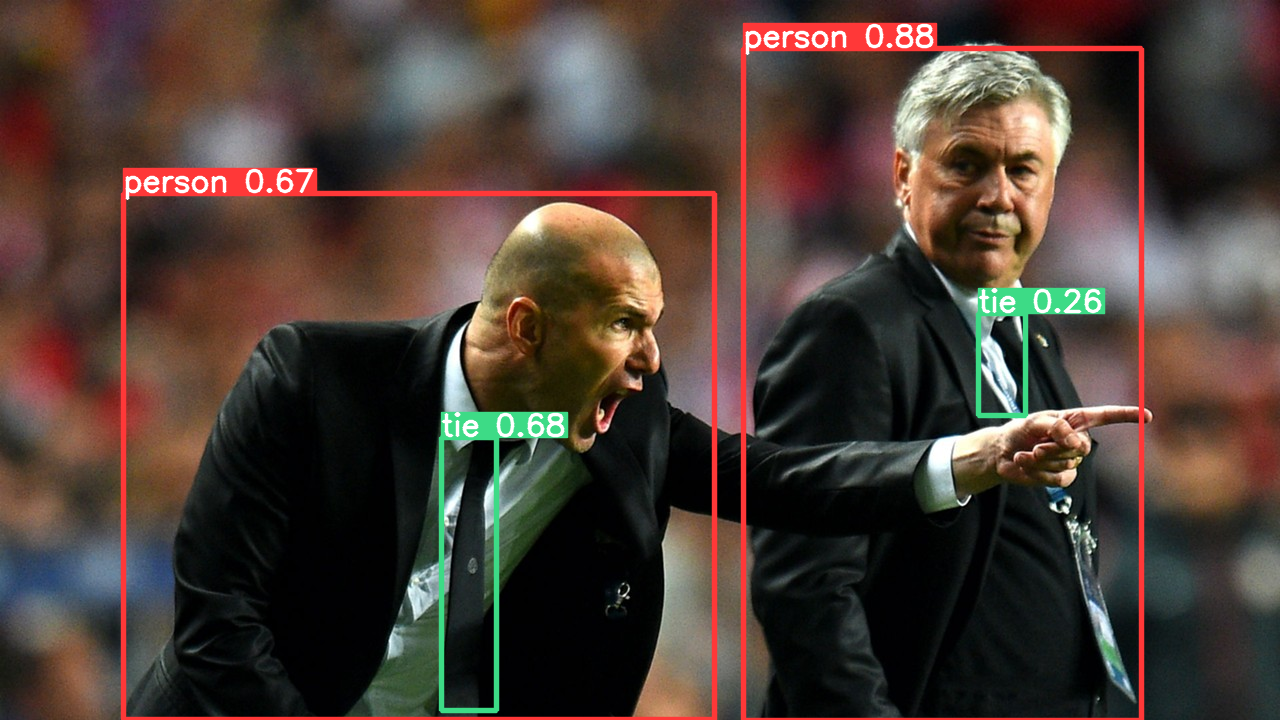

In [3]:
# Images
img = "https://ultralytics.com/images/zidane.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
results.show()

# Try Dataset

In [4]:
import src
import os
from pathlib import Path
ws_path = Path(src.__file__).parent.parent
data_dir = os.path.join(ws_path, 'data', 'UAV-benchmark-M')
num_imag = 0
for s in os.listdir(data_dir):
    num_imag += len(os.listdir(os.path.join(data_dir, s)))

print(num_imag)

40735


In [9]:
a = Image.open(os.path.join(data_dir, s, 'img000002.jpg'))
a.size

(1024, 540)

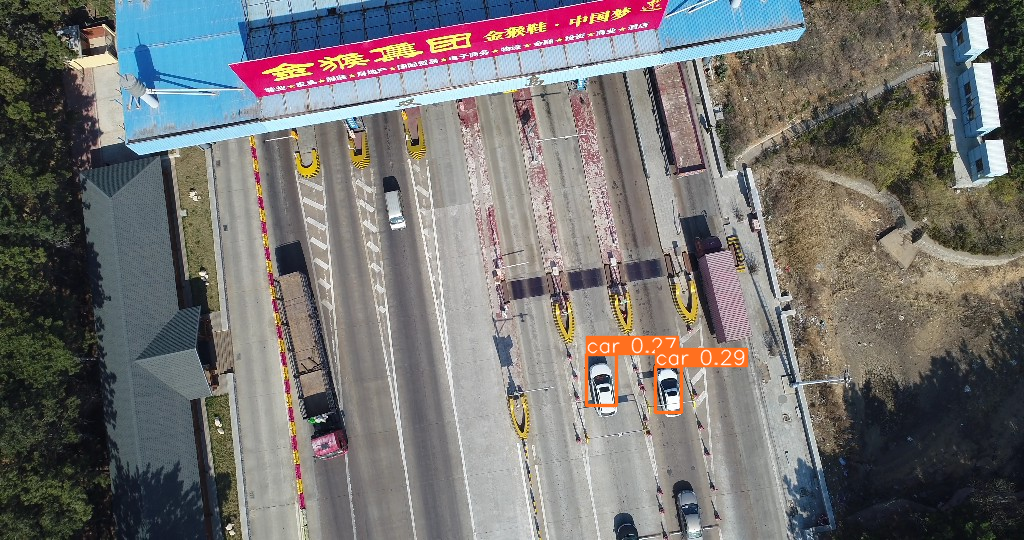

In [5]:
s = 'M0210'
results = model(os.path.join(data_dir, s, 'img000002.jpg'))
results.show()

In [7]:
results.xyxy[0]

tensor([[6.55569e+02, 3.66500e+02, 6.81148e+02, 4.12087e+02, 2.86336e-01, 2.00000e+00],
        [5.86959e+02, 3.54839e+02, 6.16899e+02, 4.05497e+02, 2.73535e-01, 2.00000e+00]], device='cuda:0')

In [8]:
results.pandas().xyxy[0]

xmin        ymin        xmax        ymax  confidence  class name
0  655.568787  366.499908  681.147522  412.086578    0.286336      2  car
1  586.958801  354.838531  616.899414  405.496826    0.273535      2  car

In [98]:
import pandas as pd
gt_dir = os.path.join(ws_path, 'data', 'UAV-benchmark-MOTD_v1.0', 'UAV-benchmark-MOTD_v1.0', 'GT')
num_mtod = 0
for s in os.listdir(gt_dir):
    if s.endswith('gt.txt'):
        data = pd.read_csv(os.path.join(gt_dir, s), sep=',', header=None)
        data.columns = ["frame_index","target_id","bbox_left","bbox_top","bbox_width","bbox_height","score","in-view","occlusion"]
        num_mtod += len(set(data["frame_index"].to_list()))
        
print(num_mtod)

40403


In [106]:
data["class"] = 0
data["x_center"] = (data["bbox_left"] + data["bbox_width"] / 2) / 1080
data["y_center"] = (data["bbox_top"] + data["bbox_height"] / 2) / 540
data["width"] = data["bbox_width"] / 1080
data["height"] = data["bbox_height"] / 540
data2 = data[["class", "x_center", "y_center", "width", "height"]]
data2

class  x_center  y_center     width    height
0          0  0.510648  0.211111  0.010185  0.022222
1          0  0.509722  0.211111  0.010185  0.022222
2          0  0.509722  0.211111  0.010185  0.022222
3          0  0.509722  0.211111  0.010185  0.022222
4          0  0.509722  0.212963  0.010185  0.022222
...      ...       ...       ...       ...       ...
13281      0  0.368056  0.268519  0.073148  0.088889
13282      0  0.368056  0.268519  0.073148  0.088889
13283      0  0.368056  0.268519  0.073148  0.088889
13284      0  0.368056  0.268519  0.073148  0.088889
13285      0  0.368056  0.268519  0.073148  0.088889

[13286 rows x 5 columns]

In [1]:
from src.dataloader import generate_yolov5_dataset
generate_yolov5_dataset()

# Try Results

In [6]:
res_csv = pd.read_csv("../runs/train/exp/results.csv")
res_csv

epoch        train/box_loss        train/obj_loss   
0                      0              0.060810              0.080785  \
1                      1              0.050029              0.074934   
2                      2              0.049696              0.072785   
3                      3              0.046928              0.069875   
4                      4              0.045551              0.067946   
..                   ...                   ...                   ...   
95                    95              0.024450              0.046854   
96                    96              0.024070              0.046245   
97                    97              0.023864              0.045904   
98                    98              0.023556              0.045238   
99                    99              0.023177              0.044466   

          train/cls_loss     metrics/precision  ...          val/obj_loss   
0                      0               0.91013  ...              0.079421  \
1                      0               0.92060  ...              0.076450   
2                      0               0.92042  ...              0.074462   
3                      0               0.94436  ...              0.066507   
4                      0               0.94988  ...              0.065118   
..                   ...                   ...  ...                   ...   
95                     0               0.97801  ...              0.050116   
96                     0               0.97804  ...              0.050038   
97                     0               0.97870  ...              0.049964   
98                     0               0.97904  ...              0.049895   
99                     0               0.97935  ...              0.049812   

            val/cls_loss                 x/lr0                 x/lr1   
0                      0              0.100000              0.033300  \
1                      0              0.099340              0.065974   
2                      0              0.098021              0.097988   
3                      0              0.097030              0.097030   
4                      0              0.097030              0.097030   
..                   ...                   ...                   ...   
95                     0              0.006940              0.006940   
96                     0              0.005950              0.005950   
97                     0              0.004960              0.004960   
98                     0              0.003970              0.003970   
99                     0              0.002980              0.002980   

                   x/lr2  
0               0.033300  
1               0.065974  
2               0.097988  
3               0.097030  
4               0.097030  
..                   ...  
95              0.006940  
96              0.005950  
97              0.004960  
98              0.003970  
99              0.002980  

[100 rows x 14 columns]

YOLOv5 🚀 2023-5-10 Python-3.10.11 torch-2.0.1+rocm5.4.2 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


requirements: /home/xinyang/.cache/torch/hub/requirements.txt not found, check failed.


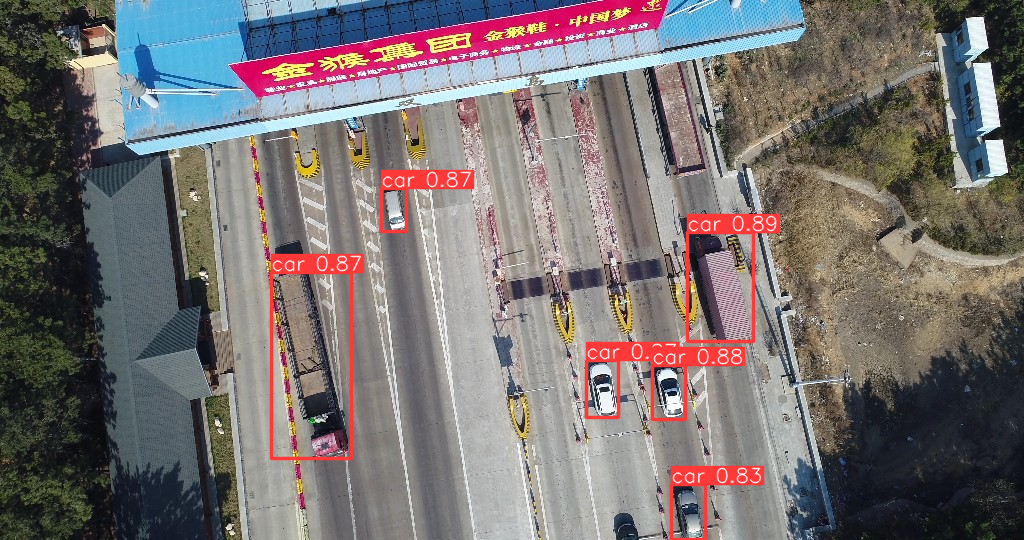

In [7]:
model = torch.hub.load('../../yolov5', 'custom', path='../runs/train/exp/weights/best.pt', source='local') 
s = 'M0210'
results = model(os.path.join(data_dir, s, 'img000002.jpg'))
results.show()